In [ ]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

라이브러리 임포트

In [ ]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup

import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

네이버 언론사별 랭킹뉴스 - 많이 본 뉴스 크롤링

In [ ]:
# 1) 데이터프레임 생성
data = pd.DataFrame(columns = ['언론사명','순위','기사제목','기사링크','수집일자'])

# 2) 네이버 언론사별 랭킹뉴스 URL
url = 'https://news.naver.com/main/ranking/popularDay.naver'

# 3) URL에서 HTML 가져오기
html = urlopen(url)

# 4) HTML 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser', from_encoding='UTF-8')

# 5) 네이버 랭킹정보가 있는 div class->rankingnews_box만 가져오기
div = soup.find_all('div',{'class': 'rankingnews_box'})

# 6) 네이버의 랭킹기사 제목, 언론사 등 데이터 크롤링
for index_div in range(0, len(div)):

  # 언론사 추출
  strong = div[index_div].find('strong',{'class':'rankingnews_name'})
  press = strong.text

  # 5개의 순의 기사 추출
  ul = div[index_div].find_all('ul',{'class':'rankingnews_list'})
  for index_r in range(0,len(ul)):
    li = ul[index_r].find_all('li')
    for index_l in range(0, len(li)):
      try:
        rank = li[index_l].find('em',{'class':'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        data = data.append({'언론사명':press,
                            '순위':rank,
                            '기사제목':title,
                            '기사링크': link,
                            '수집일자': datetime.datetime.now()}, ignore_index = True)
      except:
        pass
        
        print('Complets of'+rank+':'+title)

print('-------------------------------------------------------')
print(data)


-------------------------------------------------------
      언론사명 순위                                     기사제목  \
0     매일경제  1        “비싸도 사요”...‘3대 이모님’ 모셔가는 요즘 신혼부부들   
1     매일경제  2  “화장 안했잖아”…JMS 2인자 ‘정조은’ 얼굴 방송서 빼달라는 신도들   
2     매일경제  3   김다예 “김용호, 박수홍 이용해 엄청난 슈퍼챗…3억 4천 수익 추정”   
3     매일경제  4        “여보, 아파트 떴어”…압류된 집 공매로 마련하려는 중장년층   
4     매일경제  5         대장·간암보다 흔한 남성암...초기라는데 바로 수술해야할까   
..     ... ..                                      ...   
400  레이디경향  1                      ‘선행천사’ 정국 이즈 뭔들[화보]   
401  레이디경향  2                          남산에서 하와이를 느껴보세요   
402  레이디경향  3                 밀키트, Z세대 아닌 3040이 제일 좋아해   
403  레이디경향  4              <놀면 뭐하니?> 이미주 9년 만에 첫 솔로 출격   
404  레이디경향  5                 어린이날, 호텔서 즐기는 ‘키캉스’는 어때?   

                                                  기사링크  \
0    https://n.news.naver.com/article/009/000511872...   
1    https://n.news.naver.com/article/009/000511872...   
2    https://n.news.naver.com/article/009/000511872...   
3    https://n.

In [ ]:
data.head()

,언론사명,순위,기사제목,기사링크,수집일자
0,매일경제,1,“비싸도 사요”...‘3대 이모님’ 모셔가는 요즘 신혼부부들,https://n.news.naver.com/article/009/000511872...,2023-04-19 07:45:58.515442
1,매일경제,2,“화장 안했잖아”…JMS 2인자 ‘정조은’ 얼굴 방송서 빼달라는 신도들,https://n.news.naver.com/article/009/000511872...,2023-04-19 07:45:58.523814
2,매일경제,3,"김다예 “김용호, 박수홍 이용해 엄청난 슈퍼챗…3억 4천 수익 추정”",https://n.news.naver.com/article/009/000511872...,2023-04-19 07:45:58.526692
3,매일경제,4,"“여보, 아파트 떴어”…압류된 집 공매로 마련하려는 중장년층",https://n.news.naver.com/article/009/000511869...,2023-04-19 07:45:58.529018
4,매일경제,5,대장·간암보다 흔한 남성암...초기라는데 바로 수술해야할까,https://n.news.naver.com/article/009/000511872...,2023-04-19 07:45:58.531260


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   언론사명    405 non-null    object        
 1   순위      405 non-null    object        
 2   기사제목    405 non-null    object        
 3   기사링크    405 non-null    object        
 4   수집일자    405 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 15.9+ KB


크롤링한 데이터 저장하기 (csv)

In [ ]:
data.to_csv('네이버_랭킹뉴스_많이본뉴스_20230419.csv',encoding='UTF-8-sig',index = False)

워드클라우드 그리기

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

import konlpy
from wordcloud import WordCloud

In [ ]:
# 워드클라우드를 위한 기사제목 text로 변환
text = " ".join(li for li in data['기사제목'].astype(str))
text

'“비싸도 사요”...‘3대 이모님’ 모셔가는 요즘 신혼부부들 “화장 안했잖아”…JMS 2인자 ‘정조은’ 얼굴 방송서 빼달라는 신도들 김다예 “김용호, 박수홍 이용해 엄청난 슈퍼챗…3억 4천 수익 추정” “여보, 아파트 떴어”…압류된 집 공매로 마련하려는 중장년층 대장·간암보다 흔한 남성암...초기라는데 바로 수술해야할까 다 마신 콜라, 뚜껑 열자 바퀴벌레가... "신고 안 하면 100만 원" 회유도 "4명 살리고 떠나"...딸바보 아빠의 \'자랑스러운\' 이별 "가족과 살 곳 사라져"...육군 중사 출신 전신마비 가장에게 덮친 전세사기 부모님 따라 정했던 프로야구 응원팀…이제 AI 알고리즘이 정한다? ①美에 선물 ②재건 참여 ③나토 밀착... 尹, 우크라 군사지원 노림수는 알래스카 밤하늘에 뜬 \'소용돌이\' 정체 \'표예림 가해자 근무\' 미용실 발칵‥"인지 즉시 계약 해지" "손 덜덜덜 떨리고 눈물밖에‥" 우리 강아지에게 무슨 일이? "다음에 갚을게요"‥이름·연락처 남기고 달아난 30대 편의점 절도범 검거 강제동원 피해 할머니 대법원에 "정말 우리 죽기만 바라나" "알몸에 은밀한 부위까지 석고 떠"…정명석 엽기 성 착취 추가 폭로 "내일 파산해요" 날벼락…동탄에서도 대규모 전세사기(종합) 하늘에서 쏟아져 내린 차량들…美뉴욕시 주차장 붕괴 삼성전기 수원사업장 4층서 직원 투신…"직장내 괴롭힘 아냐" "깔깔깔" 웃음을 못 멈춰…소녀 척수손상 부른 \'해피벌룬\' 뭐길래 \'27억이 137억으로\'…금값 급등에 \'황금박쥐상\' 주목 "음속 3배로 날아 한국·대만 찍는다?…中 초음속 드론 곧 배치" "누가 그런 집 들어가래?"…조롱에 두 번 우는 전세 피해자 목줄 채워 사료 먹인 \'반인륜 악행\' 자매 포주 2심 25년·17년형 [속보] 화순 요양병원 화재 대응 2단계 발령 구조 중 "청와대를 세계인의 여행 버킷리스트로"...10개 도보 관광코스 조성 김종인 "신당, 30석 가능성 있다"..."금태섭만한 인물 없어" 충남 천안서 경찰 치고 달아난 10대 무면

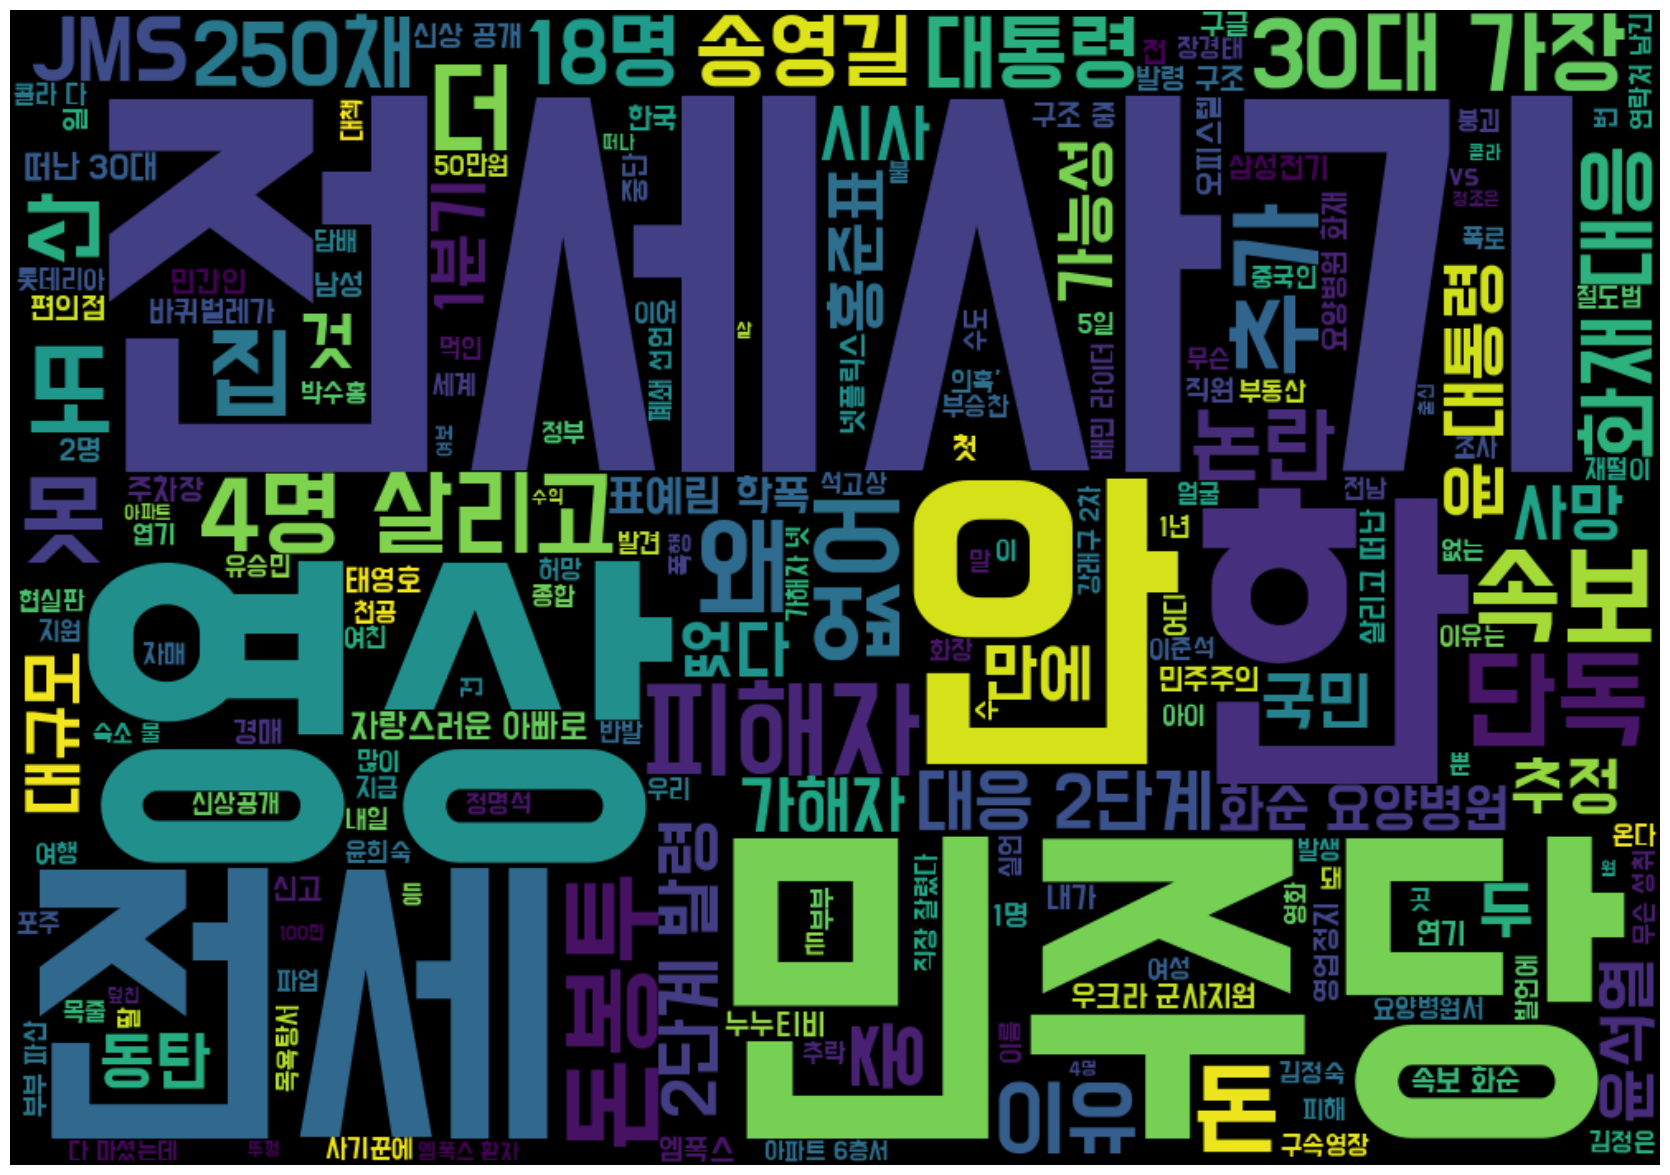

In [ ]:
# 한글폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(width=1000, height=700, font_path=font_path).generate(text)

plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

네이버 언론사별 랭킹뉴스 - 댓글이 많은 뉴스

In [ ]:
# 1) 데이터프레임 생성
data = pd.DataFrame(columns = ['언론사명','순위','기사제목','기사링크','수집일자'])

# 2) 네이버 언론사별 랭킹뉴스 URL
url = 'https://news.naver.com/main/ranking/popularMemo.naver'

# 3) URL에서 HTML 가져오기
html = urlopen(url)

# 4) HTML 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser', from_encoding='UTF-8')

# 5) 네이버 랭킹정보가 있는 div class->rankingnews_box만 가져오기
div = soup.find_all('div',{'class': 'rankingnews_box_wrap _popularRanking'})

# 6) 네이버의 랭킹기사 제목, 언론사 등 데이터 크롤링
for index_div in range(0, len(div)):

  # 언론사 추출
  strong = div[index_div].find('strong',{'class':'rankingnews_name'})
  press = strong.text

  # 5개의 순의 기사 추출
  ul = div[index_div].find_all('ul',{'class':'rankingnews_list'})
  for index_r in range(0,len(ul)):
    li = ul[index_r].find_all('li')
    for index_l in range(0, len(li)):
      try:
        rank = li[index_l].find('em',{'class':'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        data = data.append({'언론사명':press,
                            '순위':rank,
                            '기사제목':title,
                            '기사링크': link,
                            '수집일자': datetime.datetime.now()}, ignore_index = True)
      except:
        pass
        
        print('Complets of'+rank+':'+title)

print('-------------------------------------------------------')
print(data)

In [ ]:
data.head()

In [ ]:
data.info()

크롤링한 데이터 저장하기

In [ ]:
data.to_csv('네이버_랭킹뉴스_댓글이많은뉴스_20230419.csv',encoding='UTF-8-sig',index = False)

In [ ]:
see = pd.read_csv('/content/네이버_랭킹뉴스_많이본뉴스_20230419.csv')
comment = pd.read_csv('/content/네이버_랭킹뉴스_댓글이많은뉴스_20230419.csv')

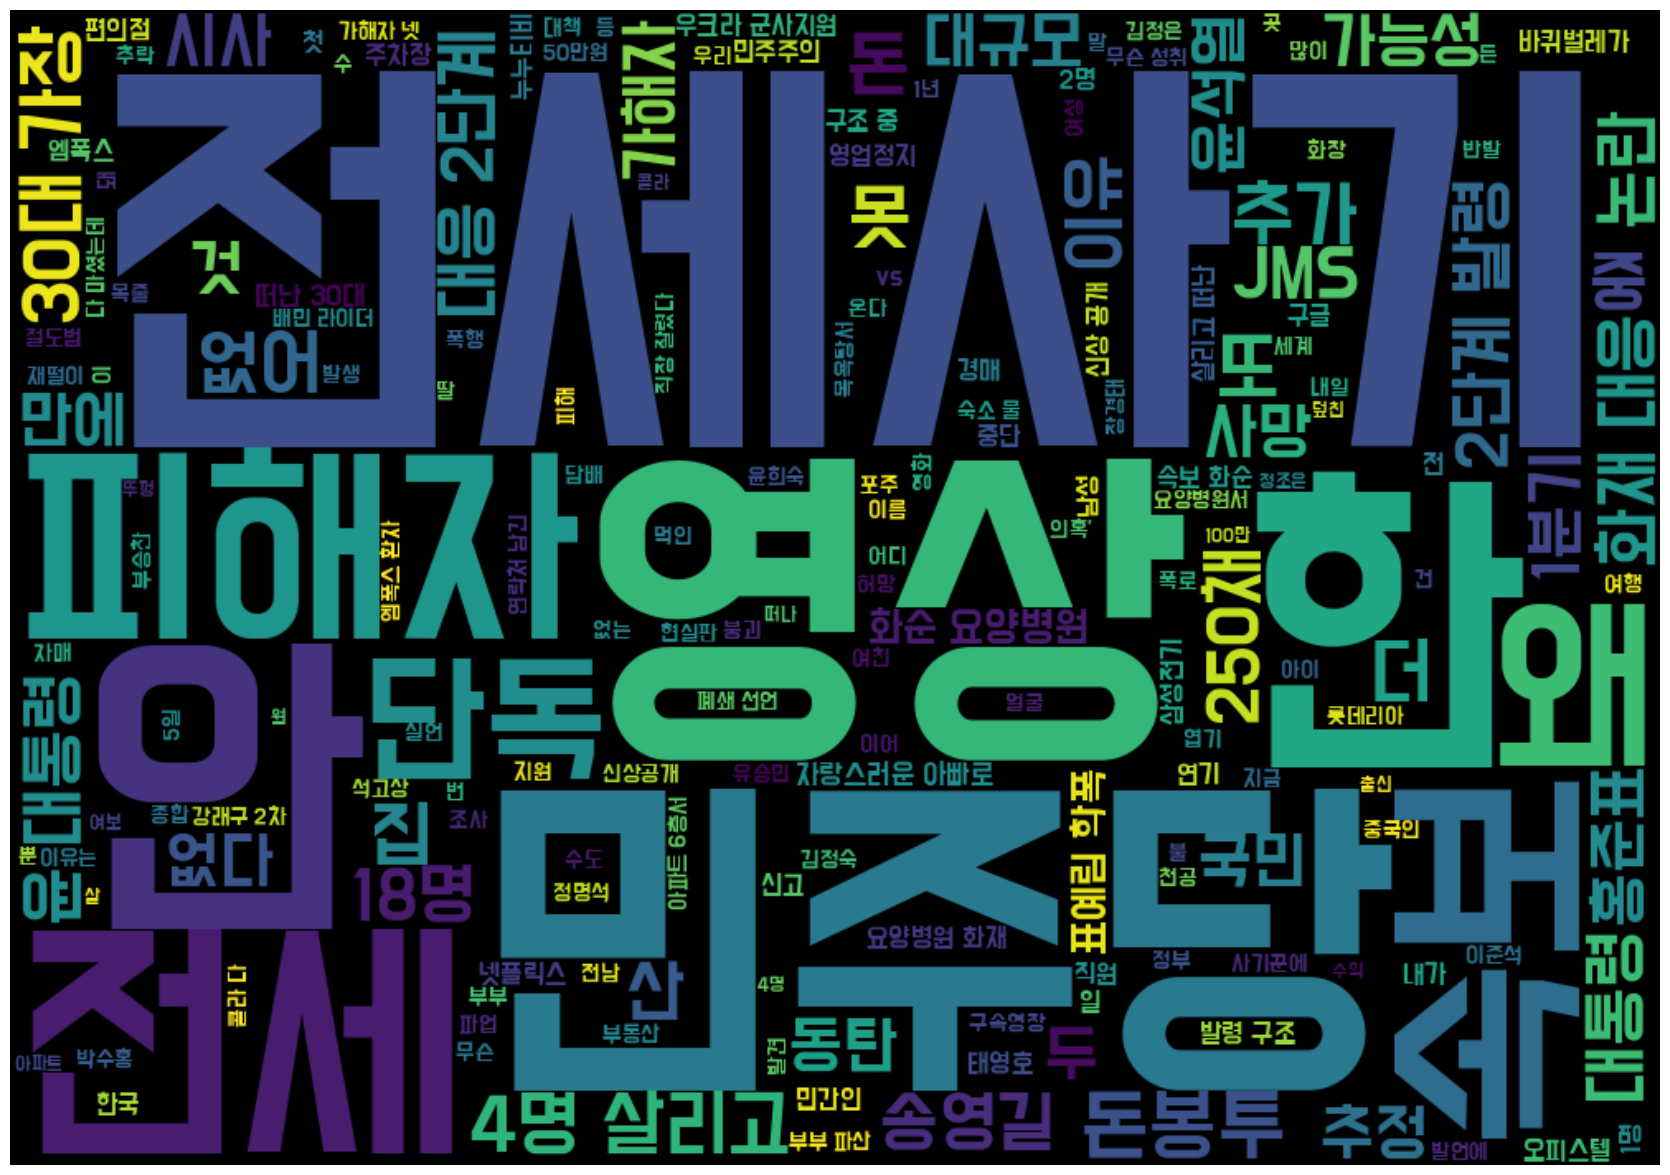

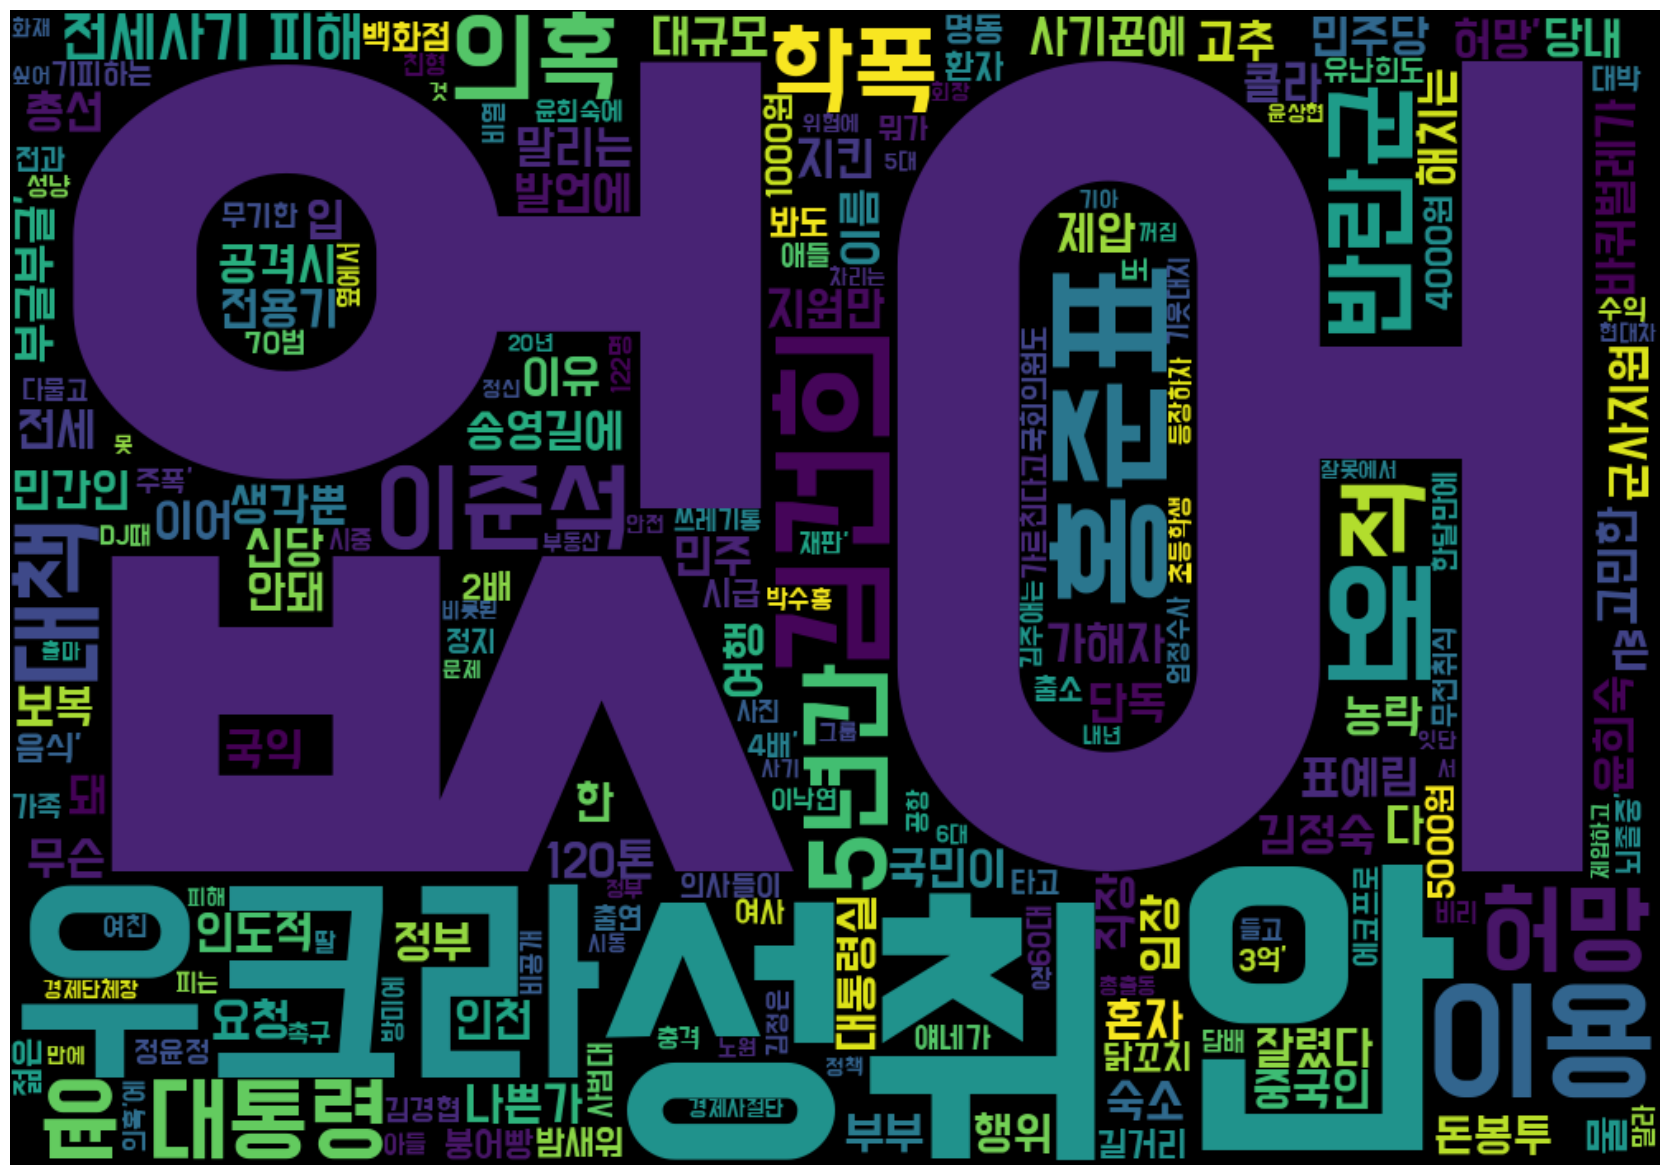

In [ ]:
###조회수
# 워드클라우드를 위한 기사제목 text로 변환
see = " ".join(li for li in see['기사제목'].astype(str))

# 한글폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(width=1000, height=700, font_path=font_path).generate(see)

plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()


### 댓글
# 워드클라우드를 위한 기사제목 text로 변환
comment = " ".join(li for li in comment['기사제목'].astype(str))

# 한글폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wordcloud2 = WordCloud(width=1000, height=700, font_path=font_path).generate(comment)

plt.axis('off')
plt.imshow(wordcloud2,interpolation='bilinear')
plt.show()

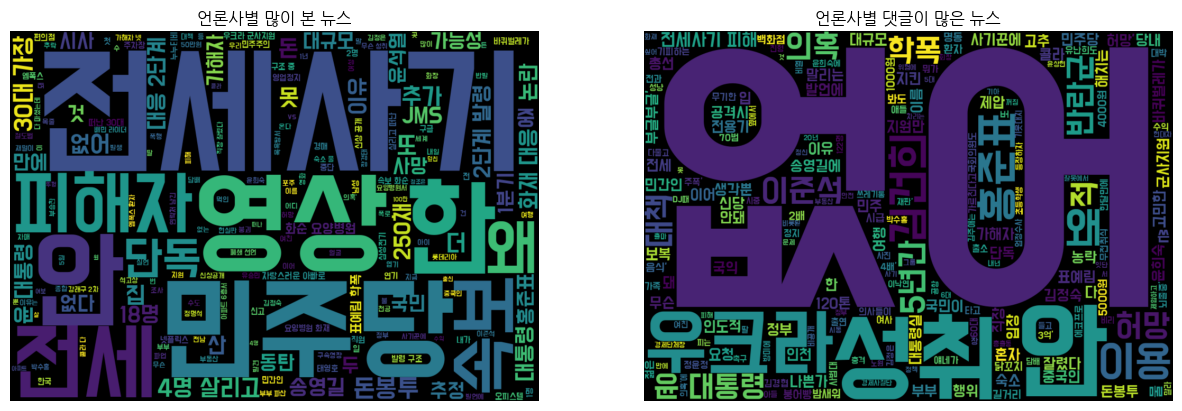

In [ ]:
import koreanize_matplotlib

fig = plt.figure(figsize=(15,5))
rows=1
cols=2

ax1=fig.add_subplot(rows,cols,1)
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.set_title('언론사별 많이 본 뉴스')
ax1.axis("off")

ax2=fig.add_subplot(rows,cols,2)
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.set_title('언론사별 댓글이 많은 뉴스')
ax2.axis("off")

plt.show()

많이 본 뉴스와 댓글이 많은 뉴스의 단어빈도수를 비교

In [ ]:
pop_df  = pd.read_csv('/content/네이버_랭킹뉴스_많이본뉴스_20230419.csv')
popm_df  = pd.read_csv('/content/네이버_랭킹뉴스_댓글이많은뉴스_20230419.csv')

In [ ]:
# 크롤링한 텍스트변환
d_text = " ".join(li for li in pop_df['기사제목'].astype(str))
m_text = " ".join(li for li in popm_df['기사제목'].astype(str))

In [ ]:
# 명사단어 추출
komoran = konlpy.tag.Komoran()
d_nn= komoran.nouns(d_text)
m_nn= komoran.nouns(m_text)

In [ ]:
# Okt(open korean text)->komoran은 '학폭'을 '학','폭'으로 나눔 okt는 '학폭
okt = konlpy.tag.Okt()
dk_nn= okt.nouns(d_text)
mk_nn= okt.nouns(m_text)


In [ ]:
dk_nn

In [ ]:
# 데이터프레임으로 변환
d_word_df = pd.DataFrame({'word':dk_nn})
m_word_df = pd.DataFrame({'word':mk_nn})

#단어수 컬럼을 추가
d_word_df['count'] = d_word_df['word'].str.len()
m_word_df['count'] = m_word_df['word'].str.len()

In [ ]:
# 글자수가 2개이상인 단어만 사용
d_word_df = d_word_df.query('count >= 2')
m_word_df = m_word_df.query('count >= 2')

# 빈도수의 집계표
d_word_df =d_word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
m_word_df =m_word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

In [ ]:
d_word_df

,word,n
1080,전세,24
567,사기,23
525,봉투,13
297,대통령,13
598,삼성,12
...,...,...
585,사죄,1
584,사정,1
583,사절단,1
582,사이트,1


Text(0.5, 1.0, '댓글이 가장 많은 뉴스')

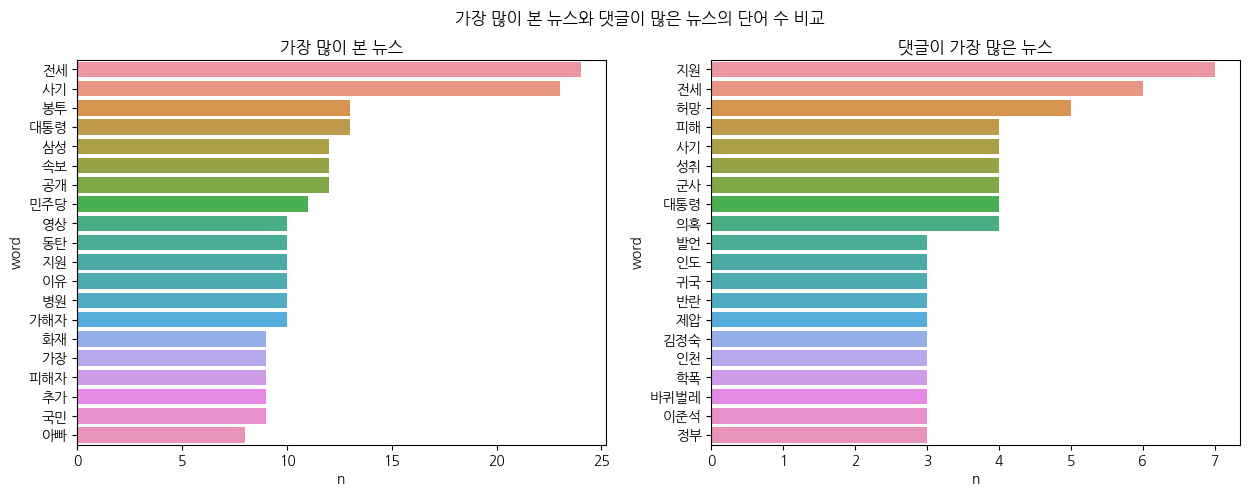

In [ ]:
# 단어 빈도 막대 그래프
# 가장 많이 본 뉴스와 댓글이 많은 뉴스의 단어 수 비교

fig,axes = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('가장 많이 본 뉴스와 댓글이 많은 뉴스의 단어 수 비교')

sns.barplot(data=d_word_df.head(20),y='word',x='n',ax=axes[0])
axes[0].set_title('가장 많이 본 뉴스')

sns.barplot(data=m_word_df.head(20),y='word',x='n',ax=axes[1])
axes[1].set_title('댓글이 가장 많은 뉴스')

In [ ]:
# komoran

# 데이터프레임으로 변환
d_word_df = pd.DataFrame({'word':d_nn})
m_word_df = pd.DataFrame({'word':m_nn})

#단어수 컬럼을 추가
d_word_df['count'] = d_word_df['word'].str.len()
m_word_df['count'] = m_word_df['word'].str.len()
# 글자수가 2개이상인 단어만 사용
d_word_df = d_word_df.query('count >= 2')
m_word_df = m_word_df.query('count >= 2')

# 빈도수의 집계표
d_word_df =d_word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
m_word_df =m_word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
# 단어 빈도 막대 그래프
# 가장 많이 본 뉴스와 댓글이 많은 뉴스의 단어 수 비교

fig,axes = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('가장 많이 본 뉴스와 댓글이 많은 뉴스의 단어 수 비교')

sns.barplot(data=d_word_df.head(20),y='word',x='n',ax=axes[0])
axes[0].set_title('가장 많이 본 뉴스')

sns.barplot(data=m_word_df.head(20),y='word',x='n',ax=axes[1])
axes[1].set_title('댓글이 가장 많은 뉴스')

In [1]:
wordcloud.to_file(filename = '슬퍼요 랭킹 뉴스 댓글')

NameError: ignored